## ТИПЫ ДАННЫХ И КОНСТРУИРОВАНИЕ ПРИЗНАКОВ

In [1]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('/home/miss/kaggle/File/adult.data', 
                   header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 
       'native-country', 'income'])

# В целях упрощения мы выберем лишь некоторые столбцы
data = data[['age', 'workclass', 'education', 'gender', 
             'hours-per-week', 'occupation', 'income']]

# Ipython.display позволяет вывести красивый вывод,
# отформатированный в Jupyter Notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [4]:
print("Исходные признаки:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Признаки после get_dummies:\n", list(data_dummies.columns))

Исходные признаки:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Признаки после get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
# Берем только те столбцы, которые содержат признаки, то есть все
# столбцы, начиная с 'age' и заканчивая 
# 'occupation_ Transport-moving'
# этот диапазон содержит все признаки, кроме целевой переменной
features = data_dummies.loc[:,
                           'age': 'occupation_ Transport-moving']
# Извлекаем массивы NumPy
X = features.values
y = data_dummies['income_ >50K'].values
print('Форма массива X: {} форма массива y {}'.format(X.shape,
                                                     y.shape))

Форма массива X: (32561, 44) форма массива y (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                random_state=0)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.8092371944478566

In [8]:
# создаем дата-фрейм c признаком, который принимает целочисленные
# значения, и категориальным признаком, у которой значения
# являются признаком
demo_df = pd.DataFrame({'Целочисленный признак': [0, 1, 2, 1],
'Категориальный признак': ['socks', 'fox', 'socks', 'box']})
demo_df

,Целочисленный признак,Категориальный признак
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [9]:
pd.get_dummies(demo_df)

,Целочисленный признак,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [10]:
demo_df['Целочисленный признак'] = \
    demo_df['Целочисленный признак'].astype(str)
pd.get_dummies(demo_df, columns=['Целочисленный признак', 
                                 'Категориальный признак'])

,Целочисленный признак_0,Целочисленный признак_1,Целочисленный признак_2,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


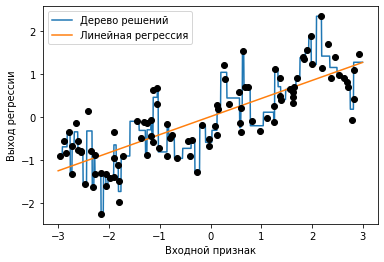

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='Дерево решений')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='Линейная регрессия')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.legend(loc='best')

In [12]:
bins = np.linspace(-3, 3, 11)
print('категории: {}'.format(bins))

категории: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [13]:
which_bin = np.digitize(X, bins=bins)
print("\nТочки данных:\n", X[:5])
print("\nКатегории для точек данных:\n", which_bin[:5])


Точки данных:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Категории для точек данных:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [14]:
from sklearn.preprocessing import OneHotEncoder
# преобразовываем с помощью OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit находит уникальные значения, имеющиеся в which_bin
encoder.fit(which_bin)
# transform осущствляет прямое кодирование
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
print("форма массива X_binned: {}".format(X_binned.shape))

форма массива X_binned: (100, 10)


Text(0.5, 0, 'Входной признак')

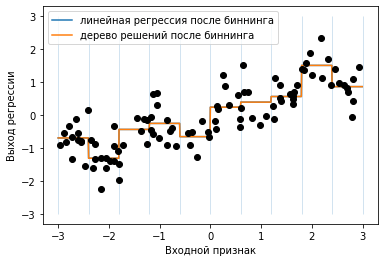

In [16]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 
         label='линейная регрессия после биннинга')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 
         label='дерево решений после биннинга')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")

In [17]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


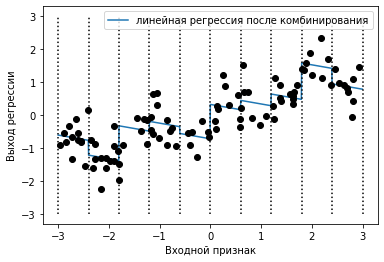

In [18]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), 
         label='линейная регрессия после комбинирования')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.plot(X[:, 0], y, 'o', c='k')

In [19]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


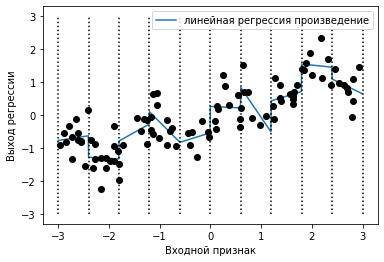

In [20]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), 
         label='линейная регрессия произведение')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# задаем степень полинома 10
# значение по умолчанию "include_bias=True" доб. признак константу 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [22]:
X_poly.shape

(100, 10)

In [23]:
print("Элементы массива X:\n{}".format(X[:5]))
print("Элементы массива X_poly:\n{}".format(X_poly[:5]))

Элементы массива X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Элементы массива X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [24]:
print("Имена полиномиальных признаков:\n{}".format(
    poly.get_feature_names()))

Имена полиномиальных признаков:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


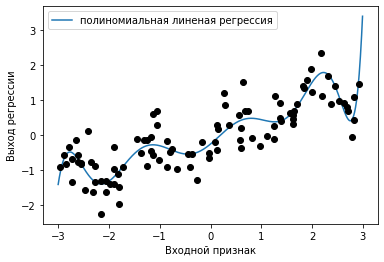

In [25]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), 
         label='полиномиальная линеная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.legend(loc='best')

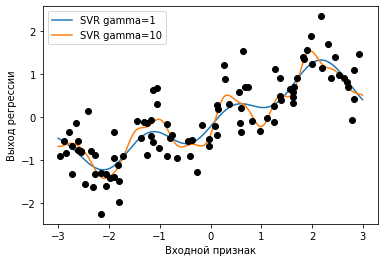

In [26]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(
    gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.legend(loc='best')

In [27]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                boston.target, random_state=0)

# масштабируем данные 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("форма обучающего массива X: {}".format(X_train.shape))
print("форма обучающего массива X полиномы и взаим: {}".format(
    X_train_poly.shape))

форма обучающего массива X: (379, 13)
форма обучающего массива X полиномы и взаим: (379, 105)


In [28]:
print("Имена полиномиальных признаков:\n{}".format(
    poly.get_feature_names()))

Имена полиномиальных признаков:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Правильность на тест наборе без взаимодействий: {:.3f}". \
      format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Правильность на тест наборе с взаимодействиями: {:.3f}". \
      format(ridge.score(X_test_poly, y_test)))

Правильность на тест наборе без взаимодействий: 0.621
Правильность на тест наборе с взаимодействиями: 0.753


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, 
                                                 y_train)
print("Правильность на тестовом наборе без взаимодействий: {:.3f}".\
      format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, 
                                                 y_train)
print("Правильность на тестовом наборе с взаимодействиями: \
{:.3f}".format(rf.score(X_test_poly, y_test)))

Правильность на тестовом наборе без взаимодействий: 0.806
Правильность на тестовом наборе с взаимодействиями: 0.764


In [31]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [32]:
print("Частоты значений:\n{}".format(np.bincount(X[:, 0])))

Частоты значений:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


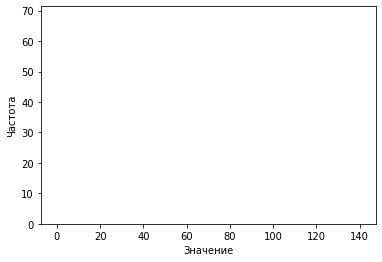

In [33]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='w')
plt.ylabel('Частота')
plt.xlabel('Значение')
plt.show()

[(0.0, 70.0)]

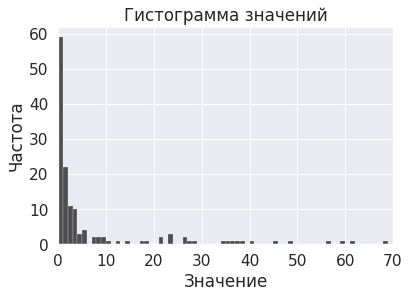

In [34]:
sns.set_theme(font_scale=1.4)
plot = sns.histplot(bins, bins=range(len(bins)), color='k')
plot.set_title("Гистограмма значений")
plot.set_xlabel('Значение')
plot.set_ylabel('Частота')
plot.set(xlim=(0, 70))

In [35]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.622


Text(0.5, 0, 'Значение')

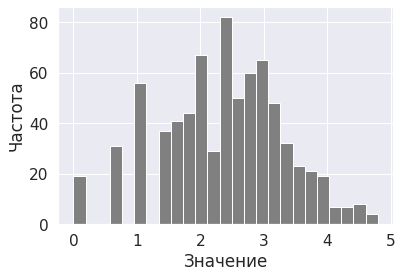

In [36]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel('Частота')
plt.xlabel('Значение')

In [37]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.875


In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# задаем определенное стартовое значение для воспроизв. результата
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# добавляем к данным шумовые признаки, первые 30 признаков являются
# исходными, остальные шумовыми
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, 
                cancer.target, random_state=0, test_size=.5)

# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# преобразовываем обучающий набор
X_train_selected = select.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(
    X_train_selected.shape))

форма массива X_train: (284, 80)
форма массива X_train_selected: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Индекс примера')

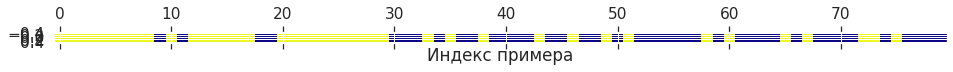

In [39]:
mask = select.get_support()
print(mask)

# визуализируем булевы значения: желтый - True, синий - False
plt.matshow(mask.reshape(1, -1), cmap='plasma')
plt.xlabel('Индекс примера')

In [40]:
from sklearn.linear_model import LogisticRegression

# преобразовываем тестовые данные
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)
print("Правильность со всеми признаками: {:.3f}".format(
    lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Правильность только с отобранными признаками: {:.3f}".format(
lr.score(X_test_selected, y_test)))

Правильность со всеми признаками: 0.951
Правильность только с отобранными признаками: 0.933


(284, 80)
(284, 40)
[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]
Правильность на тестовом наборе: 0.947


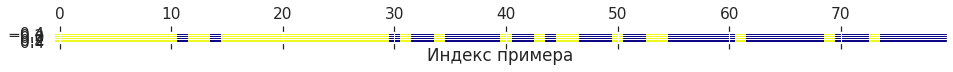

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100,
                                               random_state=42),
                        threshold='median')

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

mask = select.get_support()
print(mask)

# визуализируем булевы значения: желтый - True, синий - False
plt.matshow(mask.reshape(1, -1), cmap='plasma')
plt.xlabel('Индекс примера')

X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(
    X_test_l1, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Text(0.5, 0, 'Индекс примера')

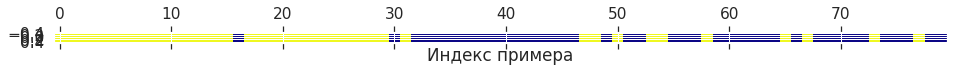

In [42]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, 
                                    random_state=42),
            n_features_to_select=40)
select.fit(X_train, y_train)

# визуализируем отобранные признаки
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='plasma')
plt.xlabel('Индекс примера')

In [43]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(
    X_test_rfe, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))
print("Правильность на тестовом наборе: {:.3f}".format(
    select.score(X_test, y_test)))

Правильность на тестовом наборе: 0.940
Правильность на тестовом наборе: 0.951


### Применение экспертных знаний

In [44]:
def load_citibike():
    data_mine = pd.read_csv('/home/miss/kaggle/File/citibike.csv')
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index('starttime')
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one

citibike = load_citibike()
citibike.head()

starttime
2019-06-01 00:00:00     48
2019-06-01 03:00:00     12
2019-06-01 06:00:00     71
2019-06-01 09:00:00    273
2019-06-01 12:00:00    269
Freq: 3H, Name: one, dtype: int64

Text(0, 0.5, 'Частота проката')

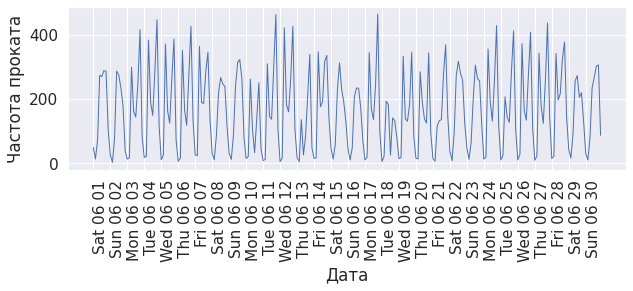

In [45]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), 
                       end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime('%a %m %d'), rotation=90,
          ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('Дата')
plt.ylabel('Частота проката')

In [46]:
# извлекаем значения зависимой переменной (количество велосипедов,
# взятых в прокат)
y = citibike.values
# преобразуем время в формат POSIX с помощью '%s'
X = citibike.index.strftime("%s").astype("int").values.reshape(-1,1)

In [47]:
# используем первые 184 точки данных для обучения, 
# а остальные для тестирования 
n_train = 184
# функция, которая строит модель на данном наборе признаков 
# и визуализирует ее
def eval_on_features(features, target, regressor):
    # разбиваем массив признаков на обучающую и тестовую выборки
    X_train, X_test = features[:n_train], features[n_train:]
    # также разбиваем массив с зависимой переменной
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("R^2 для тестового набора: {:.2f}".format(
        regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), 
               rotation=90, ha="left", fontsize=10)
    plt.plot(range(n_train), y_train, label="обуч")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-',
                label="тест")
    plt.plot(range(n_train), y_pred_train, '--', 
             label="прогноз обуч", color='yellow')
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
                label="прогноз тест")
    plt.legend(loc=(0.02, 1.1))
    plt.xlabel("Дата")
    plt.ylabel("Частота проката")

R^2 для тестового набора: -0.01


<Figure size 432x288 with 0 Axes>

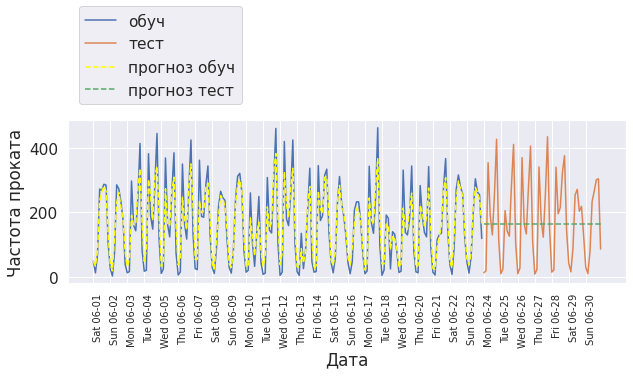

In [48]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

In [49]:
X_hour = citibike.index.hour.values.reshape(-1, 1)

R^2 для тестового набора: 0.76


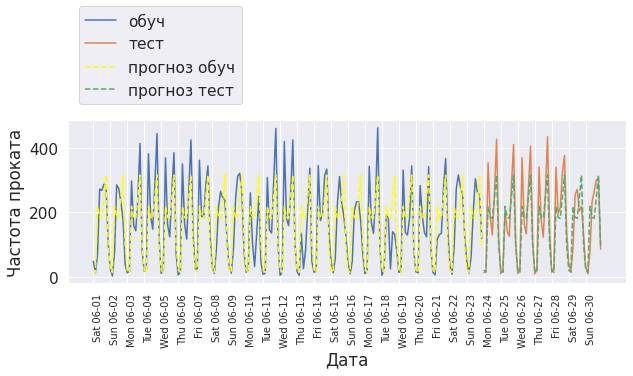

In [50]:
eval_on_features(X_hour, y, regressor)

R^2 для тестового набора: 0.92


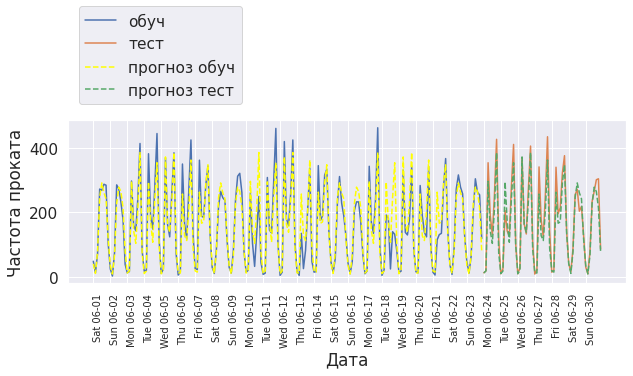

In [51]:
X_hour_week = np.hstack(
    [citibike.index.dayofweek.values.reshape(-1, 1),
    citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

R^2 для тестового набора: 0.25


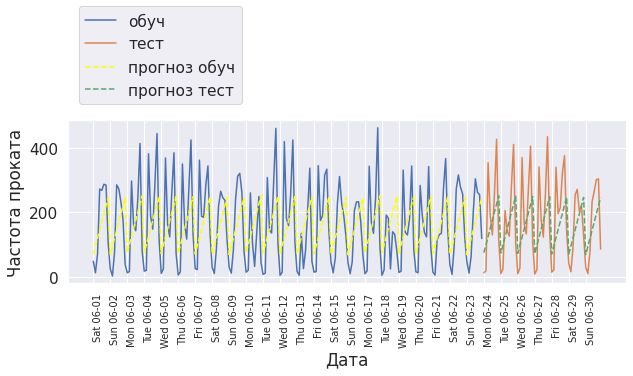

In [52]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

R^2 для тестового набора: 0.76


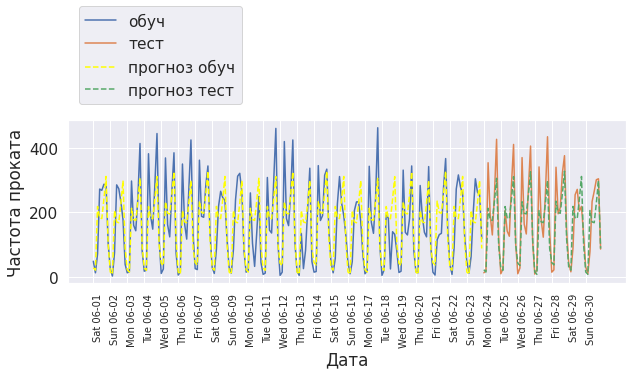

In [53]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

R^2 для тестового набора: 0.91


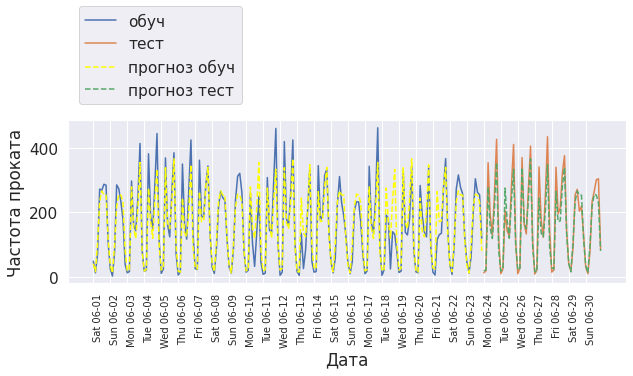

In [54]:
poly_transformer = PolynomialFeatures(degree=2, 
                interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(
    X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

Text(0, 0.5, 'Признак')

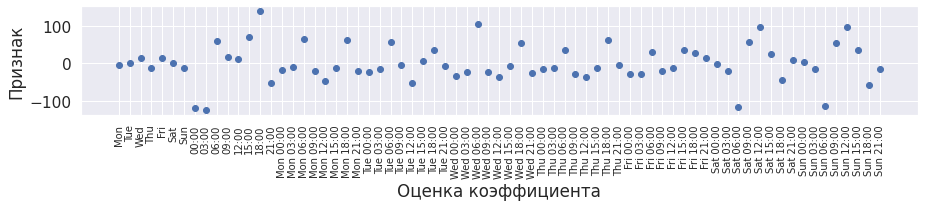

In [55]:
# создаем имена для наших признаков
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

# присваиваем имена всем взаимодействиям
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

# визуализируем коэффициенты извлеченные с линейной модели
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, 
          rotation=90, fontsize=10)
plt.xlabel('Оценка коэффициента')
plt.ylabel('Признак')

In [56]:
# продолжение в МL_Book(part_5_model_evaluation_and_improvement)